In [9]:
import numpy as np # 수치연산 관련 패키지
import pandas as pd # DataFrame을 다루는 데이터 전처리 패키지
from scipy import stats # statistics tools
import statsmodels.api as sm # linear models
import matplotlib.pyplot as plt # 기본 시각화 패키지
import seaborn as sns # 고급(?) 시각화 패키지 - R의 ggplot 같은겁니다.

# Seaborn 시각화 환경 세팅
sns.set_theme(style='white',
              rc = {'axes.unicode_minus': False,
                    'axes.spines.top':False,
                    'axes.spines.right':False,
                    'axes.titlesize':13,
                    'axes.titleweight':'semibold',
                    'font.family':'NanumSquare', #폰트이름 (ex. AppleGothic)
                    'font.weight':'normal'})
sns.despine(left=True, bottom=True)
sns.set_palette('tab10')

<Figure size 432x288 with 0 Axes>

In [10]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [3]:
df = pd.read_csv('./data/L7_factor_analysis.csv')
print('Kaiser-Meyer-Olkin(KMO) Test :', calculate_kmo(df)[1]) # recommended to be above .6
print('Bartlett’s test p-value :', calculate_bartlett_sphericity(df)[1]) # should be rejected

Kaiser-Meyer-Olkin(KMO) Test : 0.6880780768490313
Bartlett’s test p-value : 9.187012468819624e-17


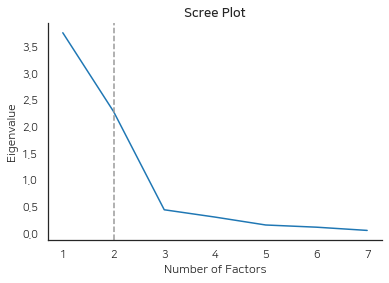

In [4]:
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa.fit(df)
ev, v = fa.get_eigenvalues()

fig = sns.lineplot(x=range(1, len(ev)+1), y=ev)
fig.set(title='Scree Plot', xlabel='Number of Factors', ylabel='Eigenvalue')
plt.axvline(2, color=[.6,.6,.6], linestyle='--')
plt.show()

In [5]:
var_fa = FactorAnalyzer(n_factors=2, rotation='varimax')
var_fa.fit(df)

variancedf = pd.DataFrame(var_fa.get_factor_variance())
variancedf.columns = 'Factor #'+pd.Series(variancedf.columns).astype(str)
variancedf.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
variancedf

,Factor #0,Factor #1
SS Loadings,3.138928,2.515386
Proportion Var,0.448418,0.359341
Cumulative Var,0.448418,0.807759


In [6]:
loadingsdf = pd.DataFrame(var_fa.loadings_)
loadingsdf.columns = 'Factor #'+pd.Series(loadingsdf.columns).astype(str)
loadingsdf.index = df.columns
loadingsdf

,Factor #0,Factor #1
GMAT,0.954243,0.198296
GPA,0.958118,-0.038656
Fellow,0.928620,0.000358
Comm,0.645709,0.523721
JobEx,0.173888,0.969930
Organze,0.019069,0.827708
Extra,0.021910,0.757906


In [7]:
vizdf = loadingsdf.reset_index().rename({'index':'variable'}, axis=1)
vizdf

,variable,Factor #0,Factor #1
0,GMAT,0.954243,0.198296
1,GPA,0.958118,-0.038656
2,Fellow,0.928620,0.000358
3,Comm,0.645709,0.523721
4,JobEx,0.173888,0.969930
5,Organze,0.019069,0.827708
6,Extra,0.021910,0.757906


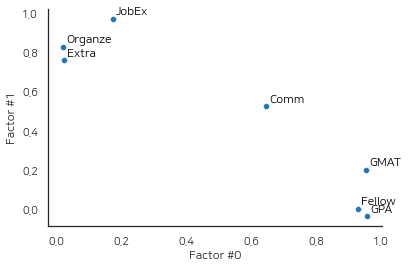

In [8]:
fig = sns.scatterplot(x='Factor #0', y='Factor #1', data=vizdf)
for row in vizdf.to_dict(orient='records'):
     fig.text(row['Factor #0']+0.01, row['Factor #1']+.02, 
     row['variable'], horizontalalignment='left', 
     size='medium', color='black')
plt.show()